In [2]:
import pandas as pd
import datetime as dt
import sqlite3

# Importing Data from Citi Bike DB

In [3]:
con = sqlite3.connect("citi_bike.db")

query = '''
SELECT started_at, start_station_name
FROM tripdata_21
WHERE start_station_name = "8 Ave & W 33 St" OR
      start_station_name = "W 33 St & 7 Ave" OR
      start_station_name = "W 31 St & 7 Ave";
'''

# Load the data into a DataFrame
herald_2021 = pd.read_sql_query(query, con, parse_dates='started_at')

con.close()

In [4]:
herald_2021_daily = herald_2021.groupby(herald_2021.started_at.dt.date).started_at.count().to_frame()
herald_2021_daily['seven_day_rolling_avg'] = herald_2021_daily.started_at.rolling(7).mean()
herald_2021_daily.head(8)

,started_at,seven_day_rolling_avg
started_at,,
2021-03-01,366,NaN
2021-03-02,326,NaN
2021-03-03,481,NaN
2021-03-04,430,NaN
2021-03-05,421,NaN
2021-03-06,223,NaN
2021-03-07,203,350.0
2021-03-08,387,353.0


In [5]:
herald_2021_daily.index = pd.to_datetime(herald_2021_daily.index)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme()

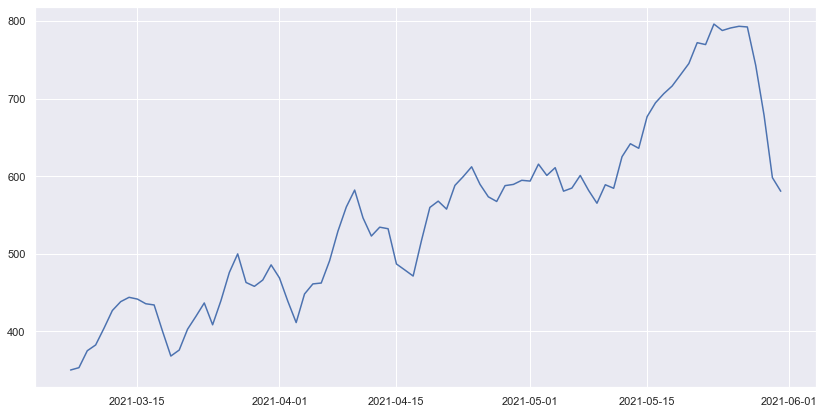

In [7]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(herald_2021_daily.index, herald_2021_daily.seven_day_rolling_avg, label='Daily Bike Trips');

In [8]:
con = sqlite3.connect("citi_bike.db")

query = '''
SELECT starttime, startstationname
FROM tripdata_19_20
WHERE startstationname = "8 Ave & W 33 St" OR
      startstationname = "W 33 St & 7 Ave" OR
      startstationname = "W 31 St & 7 Ave";
'''

# Load the data into a DataFrame
herald_19_20 = pd.read_sql_query(query, con, parse_dates='starttime')

con.close()

In [9]:
herald_19_20_daily = herald_19_20.groupby(herald_19_20.starttime.dt.date).starttime.count().to_frame()
herald_19_20_daily.index = pd.to_datetime(herald_19_20_daily.index)

herald_19_daily = herald_19_20_daily[herald_19_20_daily.index.year == 2019]
herald_20_daily = herald_19_20_daily[herald_19_20_daily.index.year == 2020]


herald_19_daily['seven_day_rolling_avg'] = herald_19_daily.starttime.rolling(7).mean()
herald_20_daily['seven_day_rolling_avg'] = herald_20_daily.starttime.rolling(7).mean()

<ipython-input-9-d073b1d91776>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  herald_19_daily['seven_day_rolling_avg'] = herald_19_daily.starttime.rolling(7).mean()
<ipython-input-9-d073b1d91776>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  herald_20_daily['seven_day_rolling_avg'] = herald_20_daily.starttime.rolling(7).mean()


In [10]:
herald_20_daily.head()

,starttime,seven_day_rolling_avg
starttime,,
2020-03-01,298,NaN
2020-03-02,886,NaN
2020-03-03,770,NaN
2020-03-04,948,NaN
2020-03-05,879,NaN


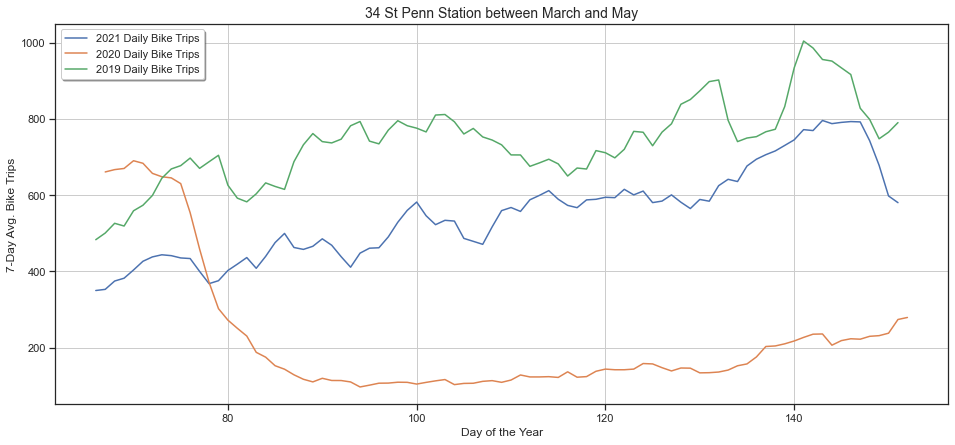

In [11]:
sns.set_style('ticks')

fig, ax = plt.subplots(figsize=(16, 7))

ax.plot(herald_2021_daily.index.dayofyear, herald_2021_daily.seven_day_rolling_avg, label='2021 Daily Bike Trips')
ax.plot(herald_20_daily.index.dayofyear, herald_20_daily.seven_day_rolling_avg, label='2020 Daily Bike Trips')
ax.plot(herald_19_daily.index.dayofyear, herald_19_daily.seven_day_rolling_avg, label='2019 Daily Bike Trips')
ax.grid()
ax.set_title('34 St Penn Station between March and May', fontsize=14)
ax.set_xlabel('Day of the Year')
ax.set_ylabel('7-Day Avg. Bike Trips')
ax.legend(shadow = True, loc = 2);


plt.savefig('Penn Station.png')